In [4]:
import pandas as pd
import numpy as np

# Parameters
num_records = 1000

# Generate synthetic data
np.random.seed(42)
data = {
    'apartment_id': np.random.randint(1, 101, num_records),
    'maintenance_type': np.random.choice(['Electrical', 'Plumbing', 'HVAC', 'General'], num_records),
    'maintenance_cost': np.round(np.random.uniform(50, 500, num_records), 2),
    'maintenance_duration': np.round(np.random.uniform(1, 10, num_records), 2),  # in hours
    'issue_reported_date': pd.date_range(start='2023-01-01', periods=num_records, freq='D'),
    'issue_resolved_date': pd.date_range(start='2023-01-02', periods=num_records, freq='D') + pd.to_timedelta(np.random.randint(1, 30, num_records), unit='D'),
    'predictive_indicator': np.random.uniform(0, 1, num_records),
    'resident_feedback_score': np.random.randint(1, 6, num_records),  # Score from 1 to 5
    'resource_allocated': np.random.choice(['Technician A', 'Technician B', 'Technician C'], num_records),
    'billing_cycle': np.random.choice(['Monthly', 'Quarterly', 'Yearly'], num_records)
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate additional fields
df['issue_resolved'] = df['issue_resolved_date'] <= df['issue_reported_date'] + pd.to_timedelta(7, unit='D')
df['cost_per_hour'] = df['maintenance_cost'] / df['maintenance_duration']

# Save to CSV
df.to_csv('synthetic_maintenance_data.csv', index=False)

print(df.head())

   apartment_id maintenance_type  maintenance_cost  maintenance_duration  \
0            52         Plumbing            363.86                  7.41   
1            93             HVAC            356.06                  8.43   
2            15          General            328.38                  1.91   
3            72          General            388.72                  3.16   
4            61       Electrical            121.37                  2.28   

  issue_reported_date issue_resolved_date  predictive_indicator  \
0          2023-01-01          2023-01-30              0.849534   
1          2023-01-02          2023-01-09              0.088990   
2          2023-01-03          2023-01-30              0.991696   
3          2023-01-04          2023-01-13              0.541003   
4          2023-01-05          2023-01-10              0.984846   

   resident_feedback_score resource_allocated billing_cycle  issue_resolved  \
0                        5       Technician B        Yearly  

## Data Inspection

In [7]:
import pandas as pd
  
df = pd.read_csv('synthetic_maintenance_data.csv')
print(df.head())
print(df.info())
print(df.describe())


   apartment_id maintenance_type  maintenance_cost  maintenance_duration  \
0            52         Plumbing            363.86                  7.41   
1            93             HVAC            356.06                  8.43   
2            15          General            328.38                  1.91   
3            72          General            388.72                  3.16   
4            61       Electrical            121.37                  2.28   

  issue_reported_date issue_resolved_date  predictive_indicator  \
0          2023-01-01          2023-01-30              0.849534   
1          2023-01-02          2023-01-09              0.088990   
2          2023-01-03          2023-01-30              0.991696   
3          2023-01-04          2023-01-13              0.541003   
4          2023-01-05          2023-01-10              0.984846   

   resident_feedback_score resource_allocated billing_cycle  issue_resolved  \
0                        5       Technician B        Yearly  

## Data Cleaning

In [10]:
is_null=df.isnull().any()
print(is_null)

apartment_id               False
maintenance_type           False
maintenance_cost           False
maintenance_duration       False
issue_reported_date        False
issue_resolved_date        False
predictive_indicator       False
resident_feedback_score    False
resource_allocated         False
billing_cycle              False
issue_resolved             False
cost_per_hour              False
dtype: bool


In [12]:
## if empty fill missing value with mean or drop rows/colums
## print(df.fillna(df.mean(), inplace=True))


In [14]:
## Corect Data Types
df['issue_reported_date'] = pd.to_datetime(df['issue_reported_date'])
df['issue_resolved_date'] = pd.to_datetime(df['issue_resolved_date'])
df['apartment_id'] = df['apartment_id'].astype('category')


In [16]:
# remove duplicate
df.drop_duplicates(inplace=True)


## Data Transformation

In [19]:
## Feature Engineering
df['maintenance_duration_days'] = (df['issue_resolved_date'] - df['issue_reported_date']).dt.days
df['maintenance_cost_per_hour'] = df['maintenance_cost'] / df['maintenance_duration']


In [21]:
##Encoding Categorical Varibles
df = pd.get_dummies(df, columns=['maintenance_type', 'resource_allocated', 'billing_cycle'])


## Data Normalization/Strandardization

In [24]:
from sklearn.preprocessing import StandardScaler
  
scaler = StandardScaler()
df[['maintenance_cost', 'maintenance_duration', 'predictive_indicator', 'maintenance_cost_per_hour']] = scaler.fit_transform(df[['maintenance_cost', 'maintenance_duration', 'predictive_indicator', 'maintenance_cost_per_hour']])


C:\Users\abham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


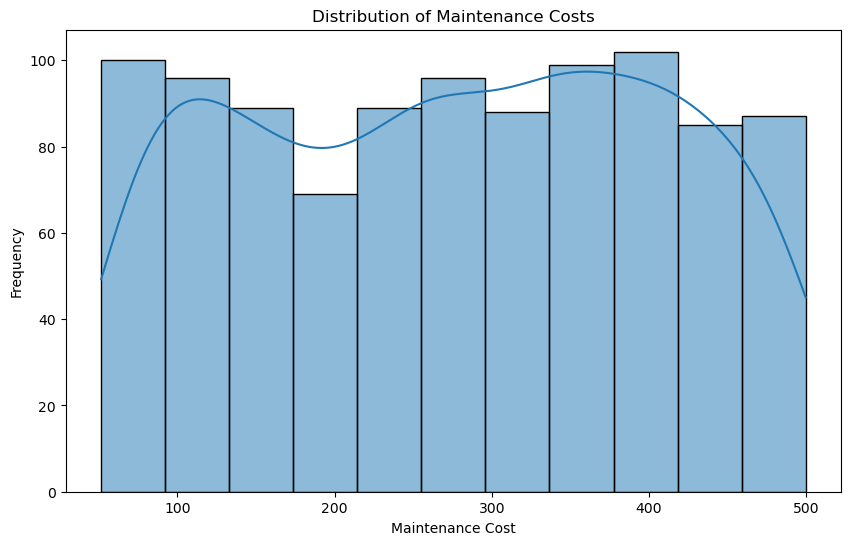

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('synthetic_maintenance_data.csv')

# Ensure correct data types
df['issue_reported_date'] = pd.to_datetime(df['issue_reported_date'])
df['issue_resolved_date'] = pd.to_datetime(df['issue_resolved_date'])
df['apartment_id'] = df['apartment_id'].astype('category')

# Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(df['maintenance_cost'], kde=True)
plt.title('Distribution of Maintenance Costs')
plt.xlabel('Maintenance Cost')
plt.ylabel('Frequency')
plt.savefig('distributionplot.png')
plt.show()





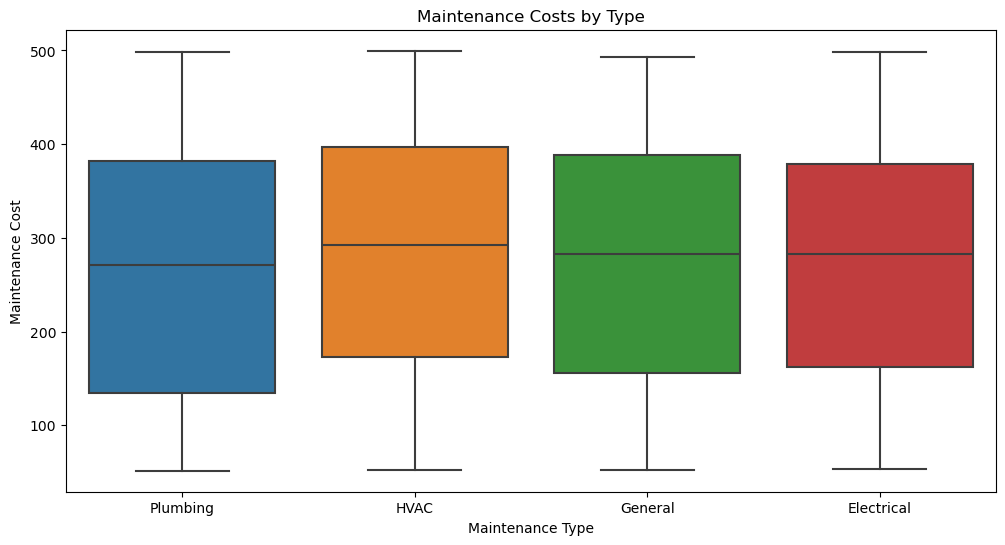

In [61]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='maintenance_type', y='maintenance_cost', data=df)
plt.title('Maintenance Costs by Type')
plt.xlabel('Maintenance Type')
plt.ylabel('Maintenance Cost')
plt.savefig('boxplot.png')
plt.show()


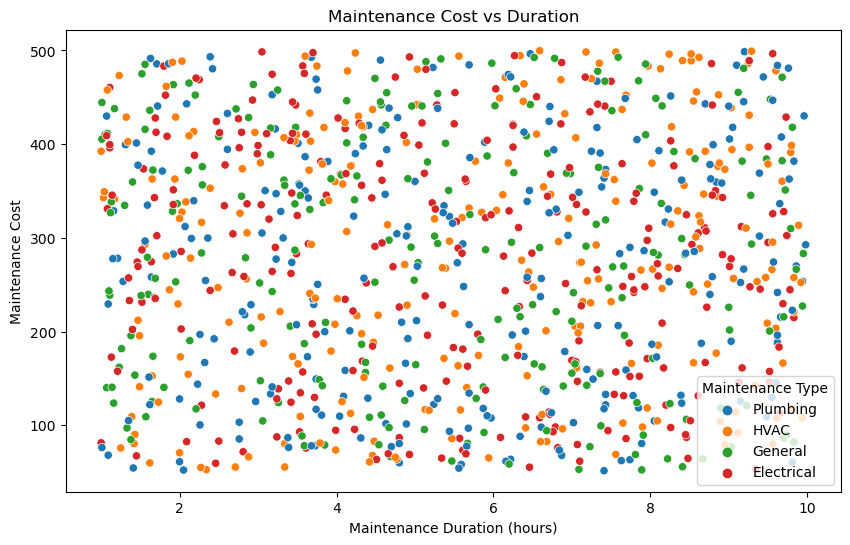

In [59]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='maintenance_duration', y='maintenance_cost', hue='maintenance_type', data=df)
plt.title('Maintenance Cost vs Duration')
plt.xlabel('Maintenance Duration (hours)')
plt.ylabel('Maintenance Cost')
plt.legend(title='Maintenance Type')
plt.savefig('scatterplot.png')
plt.show()


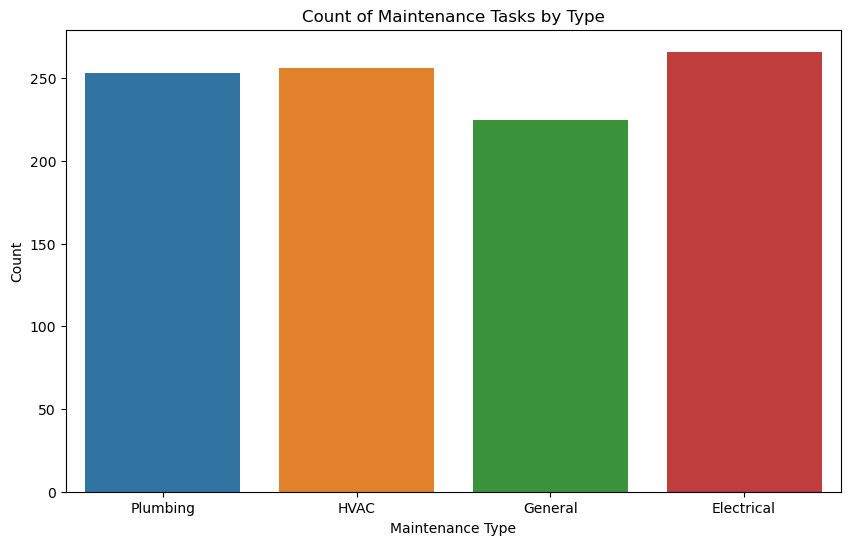

In [57]:
# Count Plot

plt.figure(figsize=(10, 6))
sns.countplot(x='maintenance_type', data=df)
plt.title('Count of Maintenance Tasks by Type')
plt.xlabel('Maintenance Type')
plt.ylabel('Count')
plt.savefig('countplot.png')
plt.show()


C:\Users\abham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\abham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


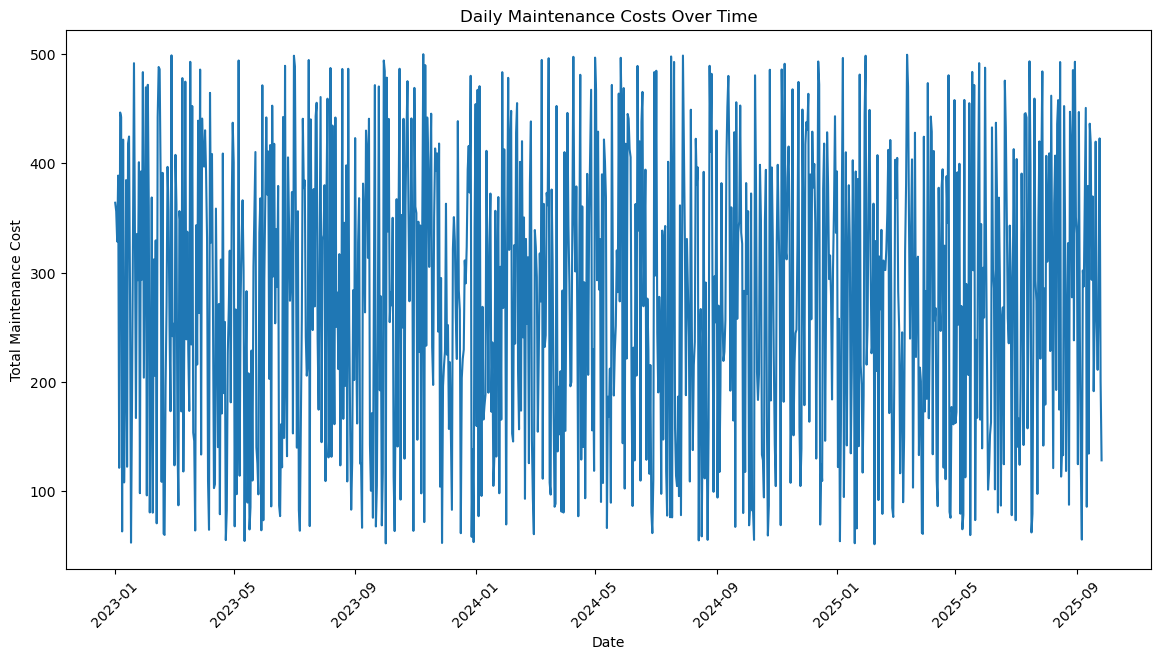

In [55]:

# Line Plot
plt.figure(figsize=(14, 7))
df['issue_reported_date'] = pd.to_datetime(df['issue_reported_date'])
daily_costs = df.groupby(df['issue_reported_date'].dt.date)['maintenance_cost'].sum().reset_index()
sns.lineplot(x='issue_reported_date', y='maintenance_cost', data=daily_costs)
plt.title('Daily Maintenance Costs Over Time')
plt.xlabel('Date')
plt.ylabel('Total Maintenance Cost')
plt.xticks(rotation=45)
plt.savefig('lineplot.png')
plt.show()


C:\Users\abham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\abham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\abham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\abham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

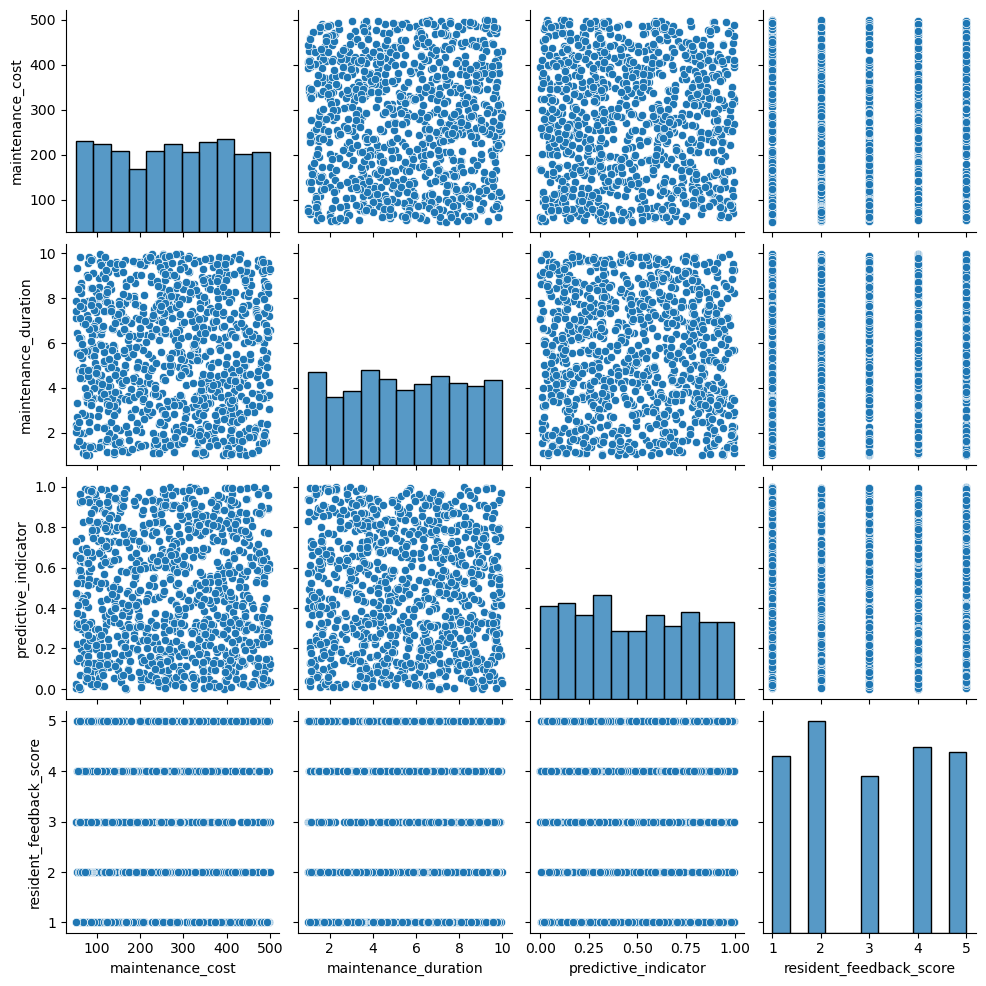

In [53]:

# Pair Plot
features = ['maintenance_cost', 'maintenance_duration', 'predictive_indicator', 'resident_feedback_score']
sns.pairplot(df[features])
plt.savefig('pairplot.png')
plt.show()



In [37]:
numeric_df = df.select_dtypes(include=[np.number])


In [38]:
numeric_df = numeric_df.dropna()  # or numeric_df.fillna(numeric_df.mean(), inplace=True)


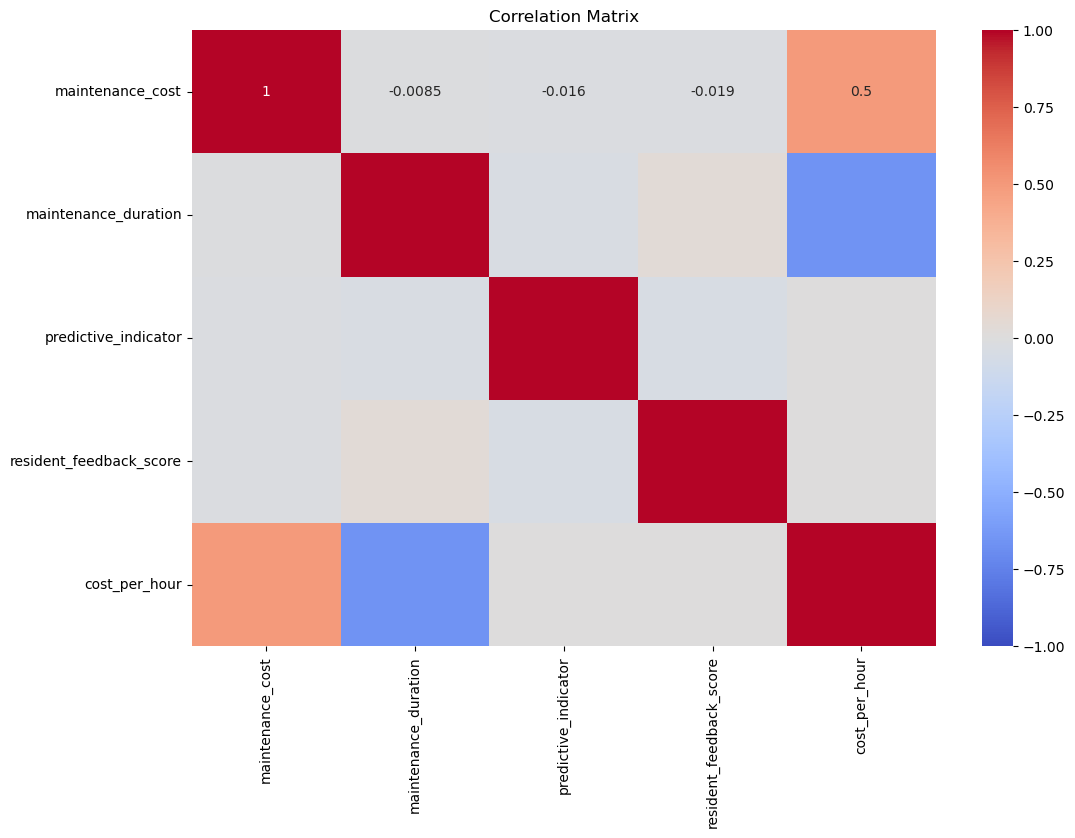

In [51]:
plt.figure(figsize=(12, 8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.savefig('heatmap.png')
plt.show()




In [44]:
from sklearn.model_selection import train_test_split
  
X = df.drop(['issue_resolved', 'issue_reported_date', 'issue_resolved_date'], axis=1)
y = df['issue_resolved']
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
print(X_train.head())
print(X_test.head())
print(y_train.value_counts())
print(y_test.value_counts())

    apartment_id maintenance_type  maintenance_cost  maintenance_duration  \
29            49          General            203.84                  2.91   
535            1       Electrical            269.18                  4.72   
695           67       Electrical            138.86                  3.26   
557           65         Plumbing            342.59                  3.64   
836           92          General            246.58                  7.47   

     predictive_indicator  resident_feedback_score resource_allocated  \
29               0.717121                        4       Technician B   
535              0.166053                        2       Technician B   
695              0.331146                        4       Technician A   
557              0.111209                        4       Technician A   
836              0.662568                        3       Technician A   

    billing_cycle  cost_per_hour  
29         Yearly      70.048110  
535     Quarterly      57.02

In [48]:
X_train.to_csv('X_train_processed.csv', index=False)
X_test.to_csv('X_test_processed.csv', index=False)
y_train.to_csv('y_train_processed.csv', index=False)
y_test.to_csv('y_test_processed.csv', index=False)